In [1]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir("/data/dhence/a/pborse2/inputdata/ISWS_data/Champaign")

In [2]:
csv = [pd.read_csv(f) for f in glob.glob("*.csv")]

# Temporal analysis of precipitation

In [9]:
yrs = range(1999,2022)

In [3]:
def aprnov(filelist):
    l1 = [np.where(f['DAY']==1) for f in filelist]
    l30= [np.where(f['DAY']==30) for f in filelist]
    yrs = range(1999,2022)
    aprnov1 = []
    from datetime import datetime
    for i in range(len(filelist)):
        if(len(l30[i])!=9):
            df1 = filelist[i][l1[i][0][3]:l30[i][0][-2]+1]
        else:
            df1= filelist[i][l1[i][0][3]:l30[i][0][-1]+1]
        datelist = pd.date_range(start = str(yrs[i])+"-03-01", periods=len(df1['DAY'])).tolist()
        df1['date']= datelist
        df1= df1.set_index('date')
        aprnov1.append(df1)
    return aprnov1

In [4]:
aprnov(csv)[1]

/tmp/ipykernel_71648/2280717333.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']= datelist
/tmp/ipykernel_71648/2280717333.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']= datelist
/tmp/ipykernel_71648/2280717333.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,DAY,MAX AIR TEMP oF,MIN AIR TEMP oF,AVG AIR TEMP oF,TOTAL PRECIP oF,MAX REL HUM %
date,,,,,,
2000-03-01,1.0,56.4,38.0,48.4,0.09,93.3
2000-03-02,2.0,57.4,39.2,47.3,0.05,94.4
2000-03-03,3.0,67.1,36.4,51.6,0.00,88.0
2000-03-04,4.0,78.5,42.8,60.3,0.00,83.0
2000-03-05,5.0,74.8,45.3,61.3,0.00,93.7
...,...,...,...,...,...,...
2000-10-25,26.0,54.8,23.8,41.7,0.00,75.5
2000-10-26,27.0,57.5,44.8,50.9,0.29,97.5
2000-10-27,28.0,59.8,34.7,52.5,0.73,96.8


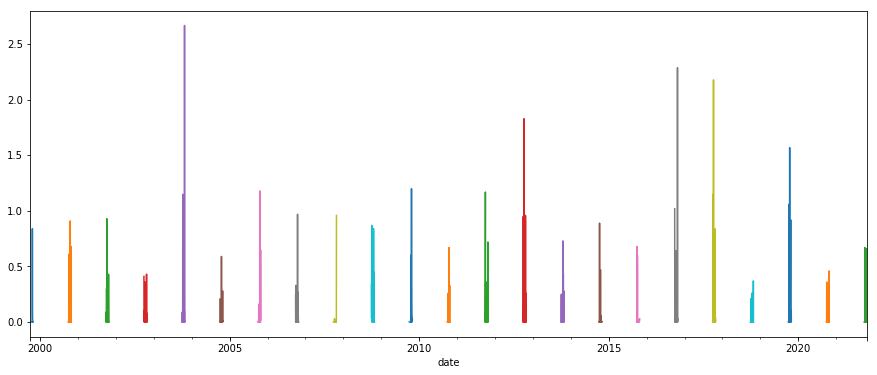

In [79]:
# from matplotlib.pyplot import figure
# figure(figsize=(15,6))
# for df in aprnov:
#     df1 = df['TOTAL PRECIP oF'][180:210]
#     df1.plot()

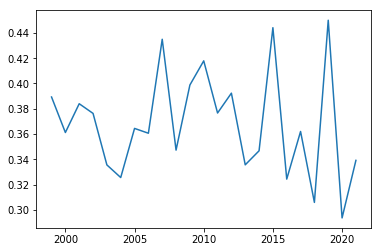

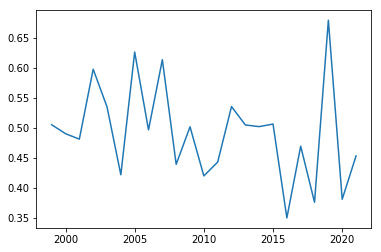

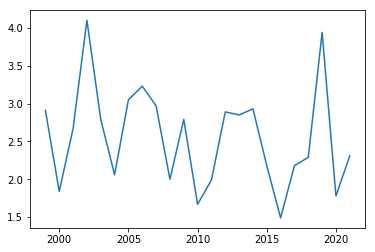

In [21]:
# mean = [df['TOTAL PRECIP oF'][df['TOTAL PRECIP oF']!=0].mean() for df in aprnov]
# std = [df['TOTAL PRECIP oF'][df['TOTAL PRECIP oF']!=0].std() for df in aprnov]
# maxi = [df['TOTAL PRECIP oF'][df['TOTAL PRECIP oF']!=0].max() for df in aprnov]
# plt.plot(yrs,mean)
# plt.show()
# plt.plot(yrs,std)
# plt.show()
# plt.plot(yrs,maxi)
# plt.show()


# WEEKLY ANALYSIS

In [19]:
# monmean = [[df['TOTAL PRECIP oF'][i:i+30][df['TOTAL PRECIP oF'][i:i+30]!=0].mean() for i in range(0,len(df['DAY']),31)] for df in aprnov]
# monstd = [[df['TOTAL PRECIP oF'][i:i+30][df['TOTAL PRECIP oF'][i:i+30]!=0].std() for i in range(0,len(df['DAY']),31)] for df in aprnov]

In [20]:
# monmean

[[0.43500000000000005,
  0.42769230769230765,
  0.385,
  0.38833333333333336,
  0.9875,
  0.328,
  0.2745454545454545,
  0.06444444444444446],
 [0.32636363636363636,
  0.1925,
  0.40800000000000003,
  0.3409090909090909,
  0.188,
  0.994,
  0.3271428571428571,
  0.398],
 [0.26,
  0.24,
  0.6126666666666666,
  0.26999999999999996,
  0.5885714285714284,
  0.33888888888888885,
  0.5515384615384616,
  0.14],
 [0.25249999999999995,
  0.5054545454545455,
  0.5118750000000001,
  0.965,
  0.10937500000000001,
  0.626,
  0.1836363636363636,
  0.22777777777777775],
 [0.5092857142857142,
  0.312,
  0.43727272727272726,
  0.38555555555555554,
  0.1125,
  0.08166666666666667,
  0.388,
  0.15555555555555556],
 [0.18222222222222223,
  0.28571428571428564,
  0.48857142857142855,
  0.497,
  0.322,
  0.6933333333333332,
  0.23882352941176474,
  0.304],
 [0.21666666666666667,
  0.23916666666666667,
  0.257,
  0.7975,
  1.466,
  0.31,
  0.12555555555555556,
  0.2725],
 [0.23899999999999996,
  0.2975,
  0.

In [22]:
# for i in range(len(aprnov)):
#     print([max(monmean[i]), monmean[i].index(max(monmean[i])), min(monmean[i])],[monmean[i][monstd[i].index(max(monstd[i]))],max(monstd[i]), monstd[i].index(max(monstd[i]))])
# #plt.plot(yrs, [max(m) for m in monmean])

([0.9875, 4, 0.06444444444444446], [0.9875, 0.9613643578640872, 4])
([0.994, 5, 0.188], [0.994, 0.6716993375015342, 5])
([0.6126666666666666, 2, 0.14], [0.5515384615384616, 0.7297813160329396, 6])
([0.965, 3, 0.10937500000000001], [0.965, 1.3184298020210035, 3])
([0.5092857142857142, 0, 0.08166666666666667], [0.43727272727272726, 0.8899673129850433, 2])
([0.6933333333333332, 5, 0.18222222222222223], [0.6933333333333332, 1.1835680518387328, 5])
([1.466, 4, 0.12555555555555556], [1.466, 1.2130251440098017, 4])
([0.83625, 4, 0.14250000000000002], [0.83625, 1.1714086453009105, 4])
([0.8242857142857142, 5, 0.2664285714285714], [0.8242857142857142, 0.8221690244480784, 5])
([0.5183333333333334, 5, 0.11], [0.48416666666666663, 0.6442960687777197, 2])
([0.6636363636363637, 1, 0.2058333333333333], [0.5812499999999998, 0.9874127447888389, 4])
([0.9442857142857142, 2, 0.2938461538461538], [0.4566666666666667, 0.538655734212493, 4])
([0.5275000000000001, 0, 0.25363636363636366], [0.5275000000000001

# Analysis of temperature